# FEATURE ENGINEERING ASSIGNMENT 2023AIML573

<H3>Feature Engineering Assignment on high school students dataset. <br>
Data set has following dimensions and features Students demographics, study habits, parental involvement, extracurricular activities, and academic performance. <br>
The target variable- GPA </H3>

 <h1 style="background-color:#ff6347;">Task 1<h1><br>
 <b>Identify the type of each of the attributes in the dataset</b>


<b>Steps:</b><br>
1. Load the data frame in pandas dataframe
2. View few data records with df.head
3. Describe data set to get initial statistical measures
4. View data values to identify the type of data

In [36]:
# Import required python libraries for processing
import numpy  as np
import pandas as pd


In [37]:
# load the csv file in a pandas data frame using function read_csv
df_org = pd.read_csv('Student_performance_data.csv')
Student_df = df_org
# print first 5 records of dataframe Student_df
print(Student_df.head(5))



   StudentID   Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001  17.0       1          0                  2        19.833723   
1       1002  18.0       0          0                  1        15.408756   
2       1003  15.0       0          2                  3         4.210570   
3       1004  17.0       1          0                  3        10.028829   
4       1005  17.0       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0       7.0       1.0              2.0                0     0.0    1.0   
1       0.0       0.0              1.0                0     0.0    0.0   
2      26.0       0.0              2.0                0     0.0    0.0   
3      14.0       0.0              3.0                1     0.0    0.0   
4      17.0       1.0              3.0                0     0.0    0.0   

   Volunteering       GPA  GradeClass  
0             0  2.929196           2  
1           

In [38]:
# print only column heads
Col_list = Student_df.columns
print(Col_list)

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')


In [39]:
Student_df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2375.000000,2392.000000,2392.000000,2392.000000,2358.000000,2380.000000,2367.000000,2378.000000,2392.000000,2381.000000,2180.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468632,0.510870,0.877508,1.746237,9.761567,14.546639,0.301225,2.122372,0.383361,0.303234,0.197248,0.157191,1.906186,2.983696
std,690.655244,1.124404,0.499986,1.028476,1.000411,5.658241,8.463651,0.458887,1.122941,0.486307,0.459752,0.398012,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.030526,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.653180,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408107,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In quantative feature only GPA,Study TimeWeekly is continous other are discrete wholenumbers without fractions.
The above function gives good insights about spread of Quantitative features 

In [40]:
#encoding  logic for column name and types of data
task1_df = pd.DataFrame()
task1_df['Columns']=Col_list
Nominal ,Ratio,Ordinal,Interval,C,D= 'Nominal','Ratio','Ordinal','Interval','Continous','Discrete'
task1_df['Type'] = [Nominal,Ratio,Nominal,Nominal,Nominal,Ratio,Ratio,Nominal,Nominal,Nominal,Nominal,Nominal,Nominal,Ratio,Ordinal]
reason_tmp=[]
task1_df['Binary']=[False,False,True,False,False,False,False,True,False,True,True,True,True,False,False]
task1_df['Discrete_continous']=[D,D,D,D,D,C,D,D,D,D,D,D,D,C,D]
for type,b in zip(task1_df['Type'],task1_df['Binary']) :
    if type in [Nominal,Ordinal]:
        Prefix ='*Catergorical,Qualitative*' 
        if type == Nominal:
            order ="*Discrete labels not ordered or ranked*"
        else:
             order ="*Discrete labels with order, but no  same difference between order* "

    else:
        Prefix ='*Numerical,Quantative*'
        if type == Ratio:
            order ="*ordered units that have the same difference and zero reference.* "
        else:
             order ="*ordered units that have the same difference and No zero reference. *"
    if b=='True':
        Binary =" *special features takes on binary values*"
    else:
        Binary =' '
    reason_tmp.append(Prefix + ' '+order + Binary)
         
task1_df['Reason'] =reason_tmp

markdown_table = task1_df.to_markdown(index=False)
print(markdown_table)

| Columns           | Type    | Binary   | Discrete_continous   | Reason                                                                                         |
|:------------------|:--------|:---------|:---------------------|:-----------------------------------------------------------------------------------------------|
| StudentID         | Nominal | False    | Discrete             | *Catergorical,Qualitative* *Discrete labels not ordered or ranked*                             |
| Age               | Ratio   | False    | Discrete             | *Numerical,Quantative* *ordered units that have the same difference and zero reference.*       |
| Gender            | Nominal | True     | Discrete             | *Catergorical,Qualitative* *Discrete labels not ordered or ranked*                             |
| Ethnicity         | Nominal | False    | Discrete             | *Catergorical,Qualitative* *Discrete labels not ordered or ranked*                             |
| ParentalEducation | 

Please refer the above table with columns/dimension/features and type of feature

 <h1 style="background-color:#ff6347;">Task 2<h1><br>
 <b>Name the attribute(s) which have missing data. How many data points are missing? How will you handle missing data ?</b>


In [41]:
Student_df.shape

(2392, 15)

There are 2392 rows and 15 columns

In [42]:
Student_df.count()

StudentID            2392
Age                  2375
Gender               2392
Ethnicity            2392
ParentalEducation    2392
StudyTimeWeekly      2358
Absences             2380
Tutoring             2367
ParentalSupport      2378
Extracurricular      2392
Sports               2381
Music                2180
Volunteering         2392
GPA                  2392
GradeClass           2392
dtype: int64

We see that there are  2392 rows and columns like <b>Age,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Sports,Music </b>have missing value and hence not 2392 values. we will verify the same with isna function

In [43]:
Student_df.isna().sum()

StudentID              0
Age                   17
Gender                 0
Ethnicity              0
ParentalEducation      0
StudyTimeWeekly       34
Absences              12
Tutoring              25
ParentalSupport       14
Extracurricular        0
Sports                11
Music                212
Volunteering           0
GPA                    0
GradeClass             0
dtype: int64

The above table shows columns,missing values counts.

The missing values will be handled with technniques like
1. Dropping rows with null values
2. imputing rows with Zero,mean,median,mode,ramdom values. <br>
Based on the best fit strategy

 <h1 style="background-color:#ff6347;">Task 3<h1><br>
 <b>Give the reasons for each column that how you are handling the data. </b>


we will not use the strategy of dropping rows as there will be loss of training and testing data volume.<br>
We will use different imutation technnique based on data type and domain context.

Age has 17 missing values.Data is missing completely at random.
Range of age 15 years to 18.
it is a whole number (discrete)hence will be imputing with the mode value

In [44]:
temp = Student_df['Age'].mode()
Student_df["Age"].fillna(temp.values[0],inplace=True) # Replace missing values with the mode of the column
#Student_df["Age"].count()

StudyTimeWeekly has 34 missing values.Data is missing completely at random.
Range of StudyTimeWeekly is  >0 & <20
it is a continous value  hence will be imputing with the mean value

In [45]:
temp = Student_df['StudyTimeWeekly'].mean()
Student_df["StudyTimeWeekly"].fillna(temp,inplace=True) # Replace missing values with the mode of the column
#Student_df["StudyTimeWeekly"].count()

Absences has 12 missing values.Data is missing completely at random.
Range of StudyTimeWeekly is  0 to 29
it is a whole number(discrete value)  hence will be imputing with the mode value

In [46]:
temp = Student_df['Absences'].mode()
Student_df["Absences"].fillna(temp.values[0],inplace=True) # Replace missing values with the mode of the column
#Student_df["Absences"].count()

Tutoring has 25 missing values.Data is missing completely at random.
Range of Tutoring is  0 or 1
it is a categorical hence will be imputing with the mode value


In [47]:
temp = Student_df['Tutoring'].mode()
Student_df["Tutoring"].fillna(temp.values[0],inplace=True) # Replace missing values with the mode of the column
#Student_df["Tutoring"].count()

ParentalSupport has 14 missing values.Data is missing completely at random.
Range of Tutoring is  0 to 4
it is a categorical hence will be imputing with the mode value


In [48]:
temp = Student_df['ParentalSupport'].mode()
Student_df["ParentalSupport"].fillna(temp.values[0],inplace=True) # Replace missing values with the mode of the column
#Student_df["ParentalSupport"].count()

Sports has 11 missing values.Data is missing completely at random.
Range of Tutoring is  0 or 1
it is a categorical hence will be imputing with the mode value


In [49]:
temp = Student_df['Sports'].mode()
Student_df["Sports"].fillna(temp.values[0],inplace=True) # Replace missing values with the mode of the column
#Student_df["Sports"].count()

Music has 212 missing values.Data is missing completely at random.
Range of Tutoring is  0 or 1
it is a categorical hence will be imputing with the mode value


In [50]:
temp = Student_df['Music'].mode()
Student_df["Music"].fillna(temp.values[0],inplace=True) # Replace missing values with the mode of the column
#Student_df["Music"].count()


In [51]:
print(Student_df.count())

print(Student_df.isna().sum())

StudentID            2392
Age                  2392
Gender               2392
Ethnicity            2392
ParentalEducation    2392
StudyTimeWeekly      2392
Absences             2392
Tutoring             2392
ParentalSupport      2392
Extracurricular      2392
Sports               2392
Music                2392
Volunteering         2392
GPA                  2392
GradeClass           2392
dtype: int64
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


Thus we see that there are no missing values and we have imputes best fit values.

 <h1 style="background-color:#ff6347;">Task 4<h1><br>
 <b>Perform normalization of all numeric attributes.</b>

The following are features have <b>number</b> values.['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'] <br>
The dataset has all numberical values.<BR>
['StudentID'] is nominal unique identifier of data records and so not used in any model prediction.<br>
['Gender','Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering',] are binary nominal categories so no normalization is required. <br>
[ 'Ethnicity', 'ParentalEducation', 'ParentalSupport'] are categorical value and weuse <b>one hot encoding</b> to  normalization  them. and remove implicit order<br>
Feature normalization is mostly needed to eliminate the effect of several quantitative features measured on different scales.<br>
['Age','StudyTimeWeekly'] can only be normalised.we  will use <b>min max scaling to preserve the distribution</b><br>
MinMaxScaler doesn’t reduce the effect of outliers. but our data set feature ranges show that there are no outliers.so we can use minmax scaling<br>

['GPA'] is target variable .A target variable with a large spread of values, in turn, may result in large error gradient values causing weight values to change dramatically, making the learning process unstable so requires scaling.but since GPA spread is less we neednot normalise.<br>
['GradeClass'] is a linearly derived variable from target variable GPA.Normalisation of target variable is not required, based on above explanation<br>

In [52]:
from sklearn.preprocessing import MinMaxScaler
# scaling age 
scaler = MinMaxScaler().fit(pd.DataFrame(Student_df["Age"]))
Student_df["Age"] =scaler.transform(pd.DataFrame(Student_df["Age"]))

# scaling StudyTimeWeekly 
scaler = MinMaxScaler().fit(pd.DataFrame(Student_df["StudyTimeWeekly"]))
Student_df["StudyTimeWeekly"] =scaler.transform(pd.DataFrame(Student_df["StudyTimeWeekly"]))
Student_df[["Age",'StudyTimeWeekly']]
Student_df.head(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,0.666667,1,0,2,0.992773,7.0,1.0,2.0,0,0.0,1.0,0,2.929196,2
1,1002,1.000000,0,0,1,0.771270,0.0,0.0,1.0,0,0.0,0.0,0,3.042915,1
2,1003,0.000000,0,2,3,0.210718,26.0,0.0,2.0,0,0.0,0.0,0,0.112602,4
3,1004,0.666667,1,0,3,0.501965,14.0,0.0,3.0,1,0.0,0.0,0,2.054218,3
4,1005,0.666667,1,0,2,0.233840,17.0,1.0,3.0,0,0.0,0.0,0,1.288061,4


In [53]:
Student_df = Student_df.astype({'Ethnicity':int, 'ParentalEducation':int, 'ParentalSupport':int})

In [54]:
from sklearn.preprocessing import OneHotEncoder

print(Student_df["Ethnicity"].unique())

ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
ohe_done = ohe.fit_transform(Student_df[["Ethnicity"]])
Student_df = pd.concat([Student_df,ohe_done],axis =1)
ohe_done = ohe.fit_transform(Student_df[["ParentalEducation"]])
Student_df =  pd.concat([Student_df,ohe_done],axis =1)
ohe_done = ohe.fit_transform(Student_df[["ParentalSupport"]])
Student_df =  pd.concat([Student_df,ohe_done],axis =1).drop(columns=['Ethnicity','ParentalEducation','ParentalSupport'])
print(Student_df.head())

[0 2 1 3]
   StudentID       Age  Gender  StudyTimeWeekly  Absences  Tutoring  \
0       1001  0.666667       1         0.992773       7.0       1.0   
1       1002  1.000000       0         0.771270       0.0       0.0   
2       1003  0.000000       0         0.210718      26.0       0.0   
3       1004  0.666667       1         0.501965      14.0       0.0   
4       1005  0.666667       1         0.233840      17.0       1.0   

   Extracurricular  Sports  Music  Volunteering  ...  ParentalEducation_0  \
0                0     0.0    1.0             0  ...                  0.0   
1                0     0.0    0.0             0  ...                  0.0   
2                0     0.0    0.0             0  ...                  0.0   
3                1     0.0    0.0             0  ...                  0.0   
4                0     0.0    0.0             0  ...                  0.0   

   ParentalEducation_1  ParentalEducation_2  ParentalEducation_3  \
0                  0.0          

In [55]:
print(Student_df.columns)

Index(['StudentID', 'Age', 'Gender', 'StudyTimeWeekly', 'Absences', 'Tutoring',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass', 'Ethnicity_0', 'Ethnicity_1', 'Ethnicity_2',
       'Ethnicity_3', 'ParentalEducation_0', 'ParentalEducation_1',
       'ParentalEducation_2', 'ParentalEducation_3', 'ParentalEducation_4',
       'ParentalSupport_0', 'ParentalSupport_1', 'ParentalSupport_2',
       'ParentalSupport_3', 'ParentalSupport_4'],
      dtype='object')


 <h1 style="background-color:#ff6347;">Task 5<h1><br>
 <b>Print the average GPA for each grade respectively.</b>

In [56]:
tempdf=Student_df.groupby(['GradeClass'])[['GPA']].mean()
print(tempdf.rename(columns={'GPA': 'Average_GPA'}) )

            Average_GPA
GradeClass             
0              3.102942
1              3.001673
2              2.659742
3              2.215545
4              1.208041


 <h1 style="background-color:#ff6347;">Task 6<h1><br>
 <b>Which grade is highly involved in Sports?.</b>

In [57]:
print(Student_df.groupby(['GradeClass'])['Sports'].value_counts())
result ={}
for i in range(0,len(Student_df['GradeClass'].unique())):
    a,b = Student_df.groupby(['GradeClass'])['Sports'].value_counts().get(i)
    per = a*100/(a+b)
    result[i]= per
    print(f"Percentage of people participating in sports from each grade = {per}")
tempdf =pd.DataFrame(result.items(),columns=['group', 'per'])    
print(tempdf)
max =tempdf['per'].max()
result = tempdf.loc[tempdf['per'] == max]
#print(np.array(result.get('group'))[0])
print(f"The GPA class with highest sports participation is GradeClass {np.array(result.get('group'))[0]} with {np.array(result.get('per'))[0]} % percentage  ")


GradeClass  Sports
0           0.0        69
            1.0        38
1           0.0       178
            1.0        91
2           0.0       281
            1.0       110
3           0.0       289
            1.0       125
4           0.0       853
            1.0       358
Name: count, dtype: int64
Percentage of people participating in sports from each grade = 64.48598130841121
Percentage of people participating in sports from each grade = 66.17100371747212
Percentage of people participating in sports from each grade = 71.86700767263427
Percentage of people participating in sports from each grade = 69.80676328502416
Percentage of people participating in sports from each grade = 70.43765483071842
   group        per
0      0  64.485981
1      1  66.171004
2      2  71.867008
3      3  69.806763
4      4  70.437655
The GPA class with highest sports participation is GradeClass 2 with 71.86700767263427 % percentage  


The GPA class with highest sports participation is GradeClass 2 with 71.86700767263427 % percentage 

 <h1 style="background-color:#ff6347;">Task 7<h1><br>
 <b>Calculate the proximity measure between ( choose the measuring technique based on the column): 

Tutoring and GPA

Studytime and GPA

Studytime and absences.</b>

Steps :
1.create dataframe for each set<br>
2. calculate appropiate disimlarity matrix with python functions. and combine to get single metric with this following<br>
![Screenshot from 2024-07-14 13-50-34.png](<attachment:Screenshot from 2024-07-14 13-50-34.png>)
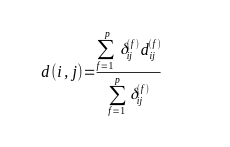

In [58]:
#Tutoring and GPA.
# Tutoring is symetric binary  
#GPA is continous ratio
# since Features are of different types we compute proximity seperatly and the combine them

from scipy.spatial.distance import pdist
new_array =np.array(Student_df['Tutoring']).reshape(-1,1)
print(len(new_array))
Tut_dis =pdist(new_array, metric='dice')  #  dice is used for binary features
print(Tut_dis.shape)

new_array =np.array(Student_df['GPA']).reshape(-1,1)
print(len(new_array))
GPA_dis =pdist(new_array) # default euclidean distance used for ratio feature
print(GPA_dis.shape)

#Combined_dis = (1*Tut_dis +1*GPA_dis)/(1+1)
Combined_dis = (Tut_dis +GPA_dis)/2
print(Combined_dis.shape)

2392
(2859636,)
2392
(2859636,)
(2859636,)


Dissimalarity between pair of different variables
combines the different attributes into a single dissimilarity matrix. The dissimilarity d(x,y)
 between objects x and y is defined  as
 

In [59]:
#Studytime and GPA
#GPA is continous ratio
#Studytime is continous ratio

new_array =np.array(Student_df[['StudyTimeWeekly','GPA']])
print(new_array.shape)
print(len(new_array))
Study_GPA_dis =pdist(new_array, 'mahalanobis')  #  mahalanobis is used for ratio features with different scaling
print(Study_GPA_dis)


(2392, 2)
2392
[0.83312265 3.81885049 1.86265083 ... 1.14041745 2.09821245 0.98175594]


In [60]:
#Studytime and absences
#GPA is continous ratio
#Absence is discrete ratio
new_array =np.array(Student_df[['StudyTimeWeekly','Absences']])
print(new_array.shape)
print(len(new_array))
Study_Absences_dis =pdist(new_array, 'mahalanobis')  #  mahalanobis is used for ratio features with different scaling
print(Study_Absences_dis)


(2392, 2)
2392
[1.1396039  3.58974257 1.93750355 ... 1.06249271 2.13408856 1.07514867]


 <h1 style="background-color:#ff6347;">Task 8<h1><br>
 <b>  Perform the feature selection considering GPA as the target variable and the rest of the columns as independent variables using the filter method. </b>

In [61]:
#pearson correlation
# Pearson correlation coefficient
corr = Student_df.corr()["GPA"].sort_values(ascending=False)[1:]

# absolute for positive values
abs_corr = abs(corr)
print(abs_corr)
# random threshold for features to keep
relevant_features = abs_corr[abs_corr>0.1]
relevant_features

new_df = Student_df[relevant_features.index]
print(new_df.columns)
print(new_df.head(5))

StudyTimeWeekly        0.181166
Tutoring               0.146647
ParentalSupport_4      0.106668
Extracurricular        0.094078
ParentalSupport_3      0.092300
Music                  0.072407
Sports                 0.057321
ParentalEducation_1    0.027352
Ethnicity_1            0.022415
ParentalEducation_2    0.020727
Ethnicity_3            0.014511
Ethnicity_2            0.008614
Volunteering           0.003258
Age                    0.003110
StudentID              0.002697
ParentalEducation_0    0.004830
ParentalSupport_2      0.011009
Gender                 0.013360
ParentalEducation_4    0.022700
Ethnicity_0            0.033402
ParentalEducation_3    0.045181
ParentalSupport_1      0.085610
ParentalSupport_0      0.123864
GradeClass             0.782835
Absences               0.916824
Name: GPA, dtype: float64
Index(['StudyTimeWeekly', 'Tutoring', 'ParentalSupport_4', 'ParentalSupport_0',
       'GradeClass', 'Absences'],
      dtype='object')
   StudyTimeWeekly  Tutoring  Parental

In [62]:
# wrapper methods
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# input and output features
X = Student_df.drop(["GPA"], axis= 1)
y = Student_df["GPA"]

# defining model to build
lin_reg = LinearRegression()

# create the RFE model and select 6 attributes
rfe = RFE(lin_reg,n_features_to_select=5)
rfe.fit(X, y)

# summarize the selection of the attributes
print(f"Number of selected features: {rfe.n_features_}\n\
Mask: {rfe.support_}\n\
Selected Features:", [feature for feature, rank in zip(X.columns.values, rfe.ranking_) if rank==1],"\n\
Estimator : {rfe.estimator_}")

Number of selected features: 5
Mask: [False False False  True False  True False False False False False False
 False False False False False False False False  True False False  True
  True]
Selected Features: ['StudyTimeWeekly', 'Tutoring', 'ParentalSupport_0', 'ParentalSupport_3', 'ParentalSupport_4'] 
Estimator : {rfe.estimator_}


In [63]:
Student_df.columns

Index(['StudentID', 'Age', 'Gender', 'StudyTimeWeekly', 'Absences', 'Tutoring',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass', 'Ethnicity_0', 'Ethnicity_1', 'Ethnicity_2',
       'Ethnicity_3', 'ParentalEducation_0', 'ParentalEducation_1',
       'ParentalEducation_2', 'ParentalEducation_3', 'ParentalEducation_4',
       'ParentalSupport_0', 'ParentalSupport_1', 'ParentalSupport_2',
       'ParentalSupport_3', 'ParentalSupport_4'],
      dtype='object')

In [64]:
# embedded menthod lasso
from sklearn import linear_model
from sklearn.linear_model import Lasso
# input and output features
X = Student_df[[ 'Age','Gender', 'Tutoring','Absences','Extracurricular', 'Sports', 'Music', 'Volunteering', 
       'Ethnicity_0', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3',
       'ParentalEducation_0', 'ParentalEducation_1', 'ParentalEducation_2',
       'ParentalEducation_3', 'ParentalEducation_4', 'ParentalSupport_0',
       'ParentalSupport_1', 'ParentalSupport_2', 'ParentalSupport_3',
       'ParentalSupport_4']]
y = Student_df["GPA"]
# train model
lasso = Lasso()
lasso.fit(X, y)

# perform feature selection
kept_cols = [feature for feature, weight in zip(X.columns.values, lasso.coef_) if weight != 0]
print(X.columns.values)
print(lasso.coef_)
print(kept_cols)


['Age' 'Gender' 'Tutoring' 'Absences' 'Extracurricular' 'Sports' 'Music'
 'Volunteering' 'Ethnicity_0' 'Ethnicity_1' 'Ethnicity_2' 'Ethnicity_3'
 'ParentalEducation_0' 'ParentalEducation_1' 'ParentalEducation_2'
 'ParentalEducation_3' 'ParentalEducation_4' 'ParentalSupport_0'
 'ParentalSupport_1' 'ParentalSupport_2' 'ParentalSupport_3'
 'ParentalSupport_4']
[-0.          0.          0.         -0.08534163  0.          0.
  0.         -0.         -0.          0.          0.          0.
 -0.          0.          0.         -0.          0.         -0.
 -0.         -0.          0.          0.        ]
['Absences']


In [65]:
# chisquare

In [66]:
# information gain
from sklearn.feature_selection import mutual_info_classif
# input and output features
X = Student_df[[ 'Absences','Age','Gender','Tutoring','Extracurricular', 'Sports' ,'Music',
 'Volunteering' ,'Ethnicity_0' ,'Ethnicity_1' ,'Ethnicity_2', 'Ethnicity_3',
 'ParentalEducation_0' ,'ParentalEducation_1' ,'ParentalEducation_2',
 'ParentalEducation_3' ,'ParentalEducation_4', 'ParentalSupport_0',
 'ParentalSupport_1', 'ParentalSupport_2', 'ParentalSupport_3',
 'ParentalSupport_4' ]]
y = Student_df["GradeClass"]
# determine the mutual information
mutual_info = mutual_info_classif(X, y)
mutual_info

array([4.86218163e-01, 8.25238390e-04, 0.00000000e+00, 3.09054449e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.44172490e-03, 2.52104393e-03, 0.00000000e+00, 4.63333455e-04,
       0.00000000e+00, 1.73022209e-02, 1.26418061e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.45154936e-02, 0.00000000e+00,
       1.62824983e-02, 9.98039339e-03])

In [67]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X, y)
X.columns[sel_five_cols.get_support()]

Index(['Absences', 'Gender', 'Extracurricular', 'Music',
       'ParentalEducation_2'],
      dtype='object')

In [68]:
# chisquare
from sklearn.feature_selection import chi2
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)
# print(X_kbest)

print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)
print('Reduced number of features:', X_kbest)

Original number of features: (2392, 22)
Reduced number of features: (2392, 2)
Reduced number of features: [[ 7.  1.]
 [ 0.  0.]
 [26.  0.]
 ...
 [20.  0.]
 [17.  0.]
 [13.  0.]]


 <h1 style="background-color:#ff6347;">Task 9<h1><br>
 <b> Perform a comparison between various feature selection methods and report the best 5 features among each technique.</b>

<b>pearson correlation</b><br>
Used to measure the strength of association between two continuous random variables.<br>
Retain the highest ranked features, discard the lowest ranked.<br>
selected feature based on criteria >0.1
['StudyTimeWeekly', 'Tutoring', 'ParentalSupport_4', 'ParentalSupport_0',
       'GradeClass', 'Absences']

<B>Information Gain</b><br>
Information Gain IG(X;Y) is a measure of the mutual independence between two random variables X and Y.<br>
Biased towards the features having large  number of values<br>
The feature with the maximum gain ratio is selected as the best feature<br>
Most import features based on information gain <br>
Index(['Absences', 'ParentalEducation_1', 'ParentalEducation_3',
       'ParentalSupport_3', 'ParentalSupport_4'],

<b>Wrapper Based Methods</b> <br>
Greedy Based algorithms<br>
Agnostic to the machine learning models chosen. <br>
Sequential feature selection algorithm add or remove one feature at a time based on the classifier performance until a desired criterion is met.<br>
<b>Pros</b><br>
 Highest performance<br>
<b>Cons</b><br>
Computationally expensive<br>
Memory intensive<br>
Selected Features: ['StudyTimeWeekly', 'Tutoring', 'ParentalSupport_0', 'ParentalSupport_3', 'ParentalSupport_4'] <br>
Estimator : {rfe.estimator_}<br>

 <h1 style="background-color:#ff6347;">Task 10<h1><br>
 <b> Write down the understanding the most important feature in words  </b>

The most important feature is <b>Absences</b> with having greeating negative correlation to target <br>
With the increase in absences there GPA decreases.<br>
other features which have impact on the GPA according toout feature selection algorithm are<br>
['StudyTimeWeekly', 'Tutoring', 'ParentalSupport_0', 'ParentalSupport_3', 'ParentalSupport_4']

 <h1 style="background-color:#ff6347;">Task 11<h1><br>
 <b> Plot the correlation plot between the independent feature and the target variable.  </b>

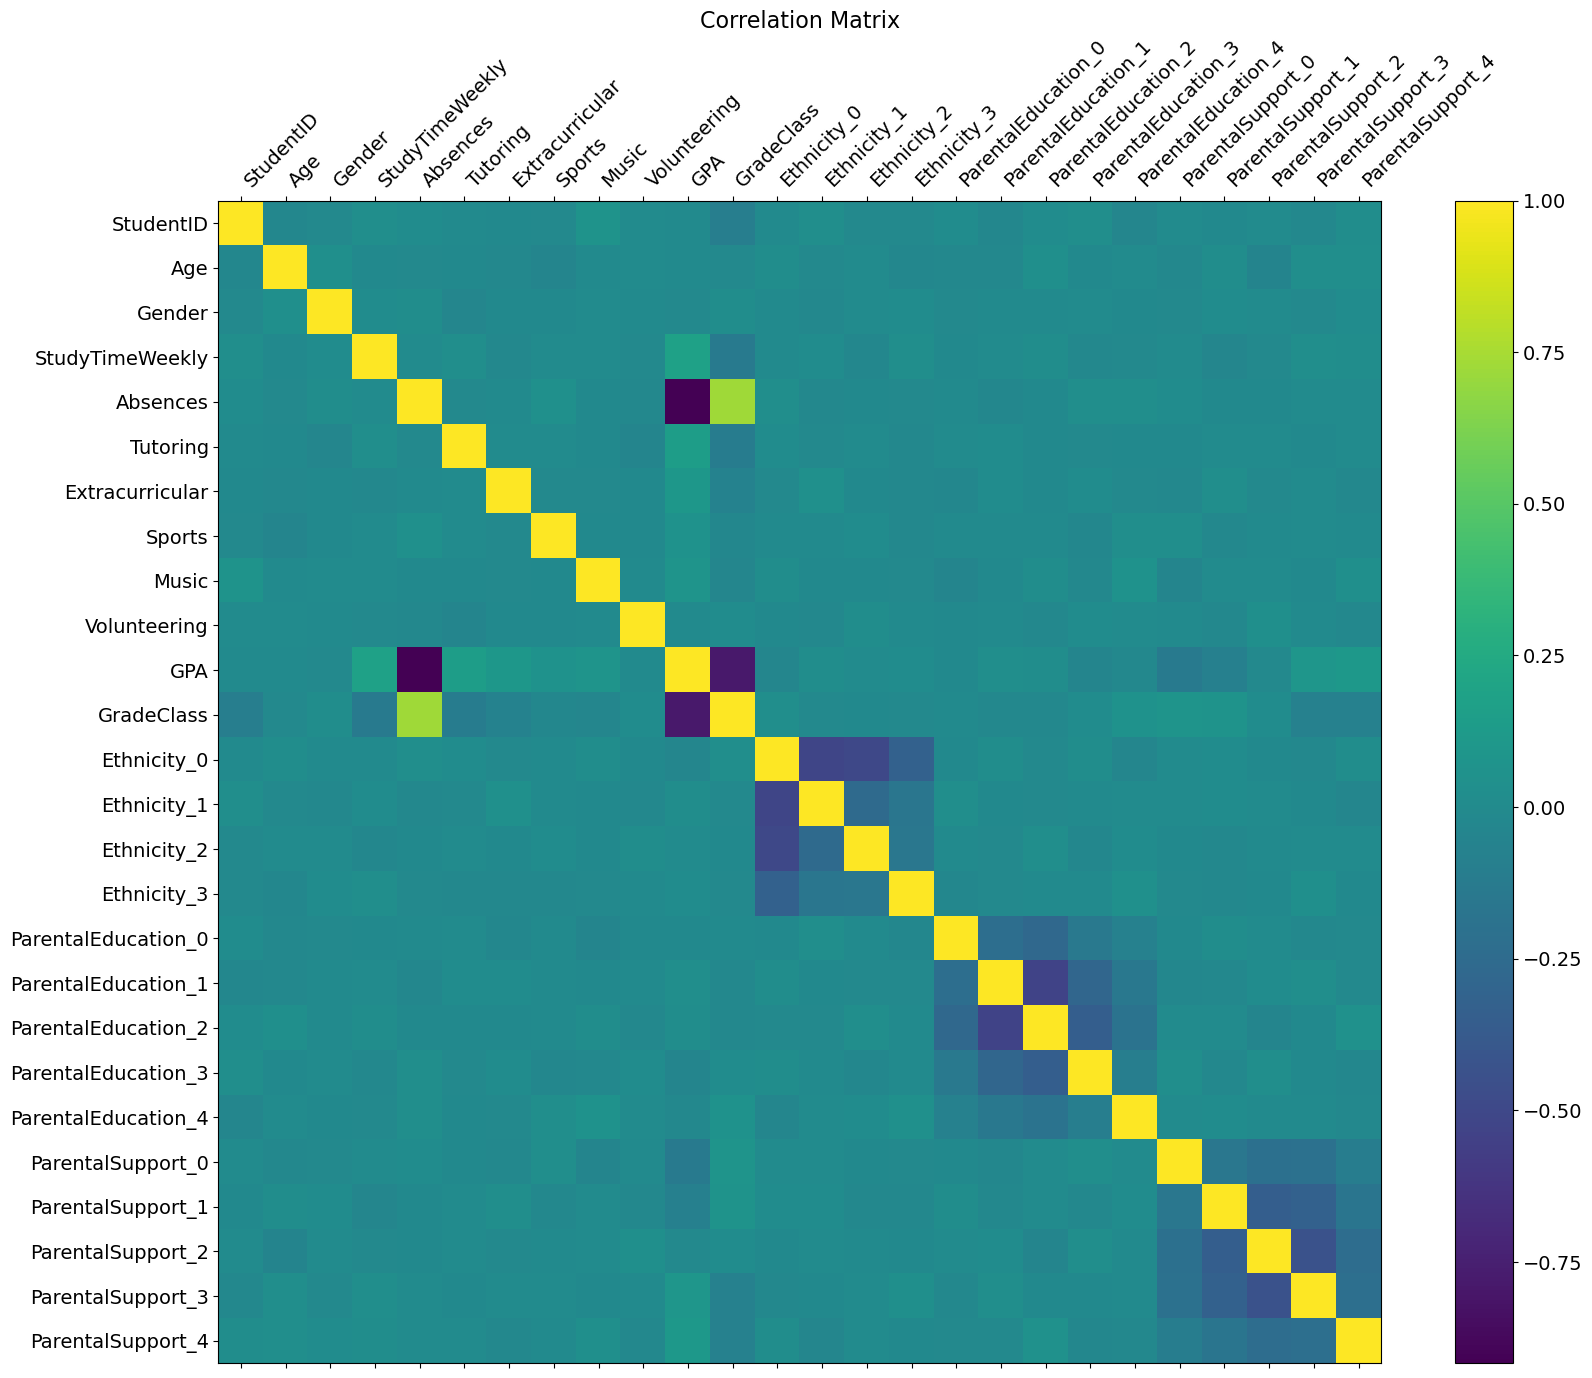

In [69]:
import matplotlib.pyplot as plt
#Student_df=Student_df.drop(columns=['StudentID','GradeClass'])
f = plt.figure(figsize=(19, 15))
plt.matshow(Student_df.corr(), fignum=f.number)
plt.xticks(range(Student_df.select_dtypes(['number']).shape[1]), Student_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(Student_df.select_dtypes(['number']).shape[1]), Student_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.xticks(ha='left')
plt.title('Correlation Matrix', fontsize=16);


In [70]:
corr = Student_df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,StudentID,Age,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,ParentalEducation_0,ParentalEducation_1,ParentalEducation_2,ParentalEducation_3,ParentalEducation_4,ParentalSupport_0,ParentalSupport_1,ParentalSupport_2,ParentalSupport_3,ParentalSupport_4
StudentID,1.00,-0.03,-0.01,0.03,0.02,0.00,-0.00,-0.02,0.06,0.01,-0.00,-0.10,-0.00,0.03,-0.01,-0.02,0.01,-0.03,0.01,0.03,-0.04,0.01,-0.01,0.01,-0.03,0.03
Age,-0.03,1.00,0.04,-0.01,-0.01,-0.01,-0.02,-0.04,0.00,0.01,0.00,-0.01,0.03,-0.02,0.01,-0.03,-0.02,-0.02,0.03,-0.01,0.01,-0.02,0.02,-0.05,0.03,0.03
Gender,-0.01,0.04,1.00,0.01,0.02,-0.03,-0.01,-0.01,0.01,-0.00,-0.01,0.02,-0.00,-0.02,0.01,0.02,-0.01,0.00,-0.00,0.01,-0.00,-0.02,0.02,0.00,-0.02,0.02
StudyTimeWeekly,0.03,-0.01,0.01,1.00,0.01,0.03,-0.03,0.01,0.01,-0.01,0.18,-0.13,-0.00,0.01,-0.03,0.03,-0.01,0.01,0.02,-0.02,-0.01,0.01,-0.04,-0.01,0.03,0.02
Absences,0.02,-0.01,0.02,0.01,1.00,-0.02,-0.00,0.04,-0.01,-0.02,-0.92,0.73,0.03,-0.02,-0.01,-0.01,-0.00,-0.03,-0.01,0.03,0.03,0.01,-0.01,-0.01,0.00,0.01
Tutoring,0.00,-0.01,-0.03,0.03,-0.02,1.00,0.01,0.01,-0.01,-0.05,0.15,-0.11,0.02,-0.01,0.01,-0.03,0.01,0.01,-0.01,-0.01,-0.01,-0.01,0.01,0.01,-0.01,0.00
Extracurricular,-0.00,-0.02,-0.01,-0.03,-0.00,0.01,1.00,-0.01,-0.02,-0.01,0.09,-0.07,-0.02,0.05,-0.01,-0.02,-0.03,0.02,-0.01,0.02,-0.02,-0.02,0.03,-0.01,0.01,-0.02
Sports,-0.02,-0.04,-0.01,0.01,0.04,0.01,-0.01,1.00,-0.01,-0.00,0.06,-0.03,-0.00,0.00,0.02,-0.02,0.00,0.00,0.00,-0.03,0.03,0.03,-0.02,-0.00,0.00,-0.00
Music,0.06,0.00,0.01,0.01,-0.01,-0.01,-0.02,-0.01,1.00,0.00,0.07,-0.04,0.02,-0.01,-0.00,-0.01,-0.05,-0.01,0.02,-0.02,0.06,-0.05,0.00,0.01,-0.01,0.04
Volunteering,0.01,0.01,-0.00,-0.01,-0.02,-0.05,-0.01,-0.00,0.00,1.00,0.00,0.01,-0.01,-0.02,0.03,0.00,-0.00,0.00,-0.02,0.02,0.01,-0.00,-0.02,0.03,0.00,-0.03


 <h1 style="background-color:#ff6347;">Task 12<h1><br>
 <b>  Write down the understanding of feature correlation in words.  </b>

Absence and target GPA are  highly negatively correlated. <br>
As there number of absences increases GPA decreases

other feature that will are studytimeweeking,Parental education based on ourother selection methods